In [2]:
import pandas as analytics
import numpy as maths
import matplotlib.pyplot as graph
from math import exp , pi
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_raw = analytics.read_csv('../data/Data1.csv')
df_raw = df_raw.drop('Unnamed: 0',axis=1)
df_raw = df_raw.rename(columns = {"0":'x',"1":'y'})
df_raw

,x,y
0,1.004939,2.319887
1,3.412653,-1.637157
2,7.483318,-1.399250
3,0.702826,2.038150
4,0.287620,2.191703
...,...,...
1595,1.475069,2.329653
1596,4.277030,2.183024
1597,0.814996,2.246927
1598,7.999698,-1.811024


<Axes: xlabel='x', ylabel='y'>

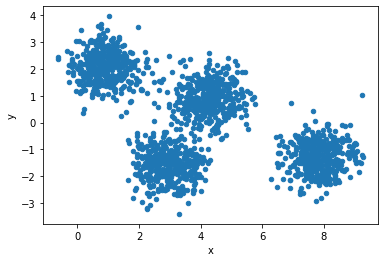

In [4]:
df_raw.plot('x','y',kind = 'scatter')

In [5]:
number_of_clusters = 4
number_of_datapoints = df_raw.shape[0]
number_of_attributes = df_raw.shape[1]

In [6]:
max_loops = 100

In [91]:
sigmas = maths.random.random(size=(number_of_clusters,number_of_attributes,number_of_attributes))
means = maths.random.random(size=(number_of_clusters,number_of_attributes,1))
probabilities = maths.random.random(size = number_of_clusters)
probabilities = probabilities/sum(probabilities)

In [92]:
print(means)
print("===")
print(sigmas)
print("===")
print(probabilities)

[[[0.32840891]
  [0.22929158]]

 [[0.62796448]
  [0.72393454]]

 [[0.63855393]
  [0.22086622]]

 [[0.58017549]
  [0.26614243]]]
===
[[[0.39660144 0.31138063]
  [0.5716175  0.94919143]]

 [[0.97087925 0.07829764]
  [0.7123828  0.78912928]]

 [[0.15807537 0.99439816]
  [0.64386939 0.19028247]]

 [[0.179288   0.73901644]
  [0.24845087 0.90410155]]]
===
[0.31790229 0.3320958  0.11506076 0.23494115]


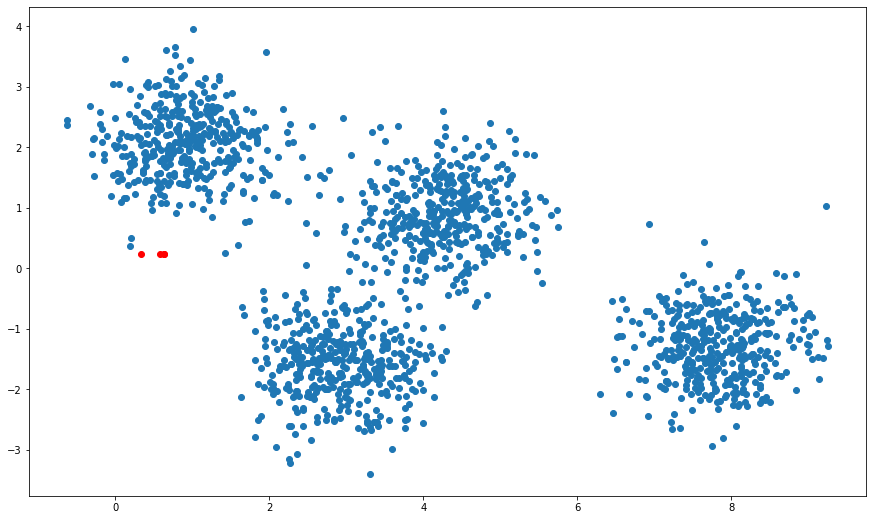

In [93]:
ratio = 6/10
width = 15
figsize = (width, width*ratio)
figure = graph.figure(figsize = figsize)
graph.scatter(df_raw['x'],df_raw['y'])
graph.scatter(means[0][0],means[0][1],c = 'red')
graph.scatter(means[1][0],means[0][1],c = 'red')
graph.scatter(means[2][0],means[0][1],c = 'red')
graph.scatter(means[3][0],means[0][1],c = 'red')

In [94]:
sigmas[0]

array([[0.39660144, 0.31138063],
       [0.5716175 , 0.94919143]])

In [133]:
sigmas = maths.random.random(size=(number_of_clusters,number_of_attributes,number_of_attributes))
means = maths.random.random(size=(number_of_clusters,number_of_attributes,1))
probabilities = maths.random.random(size = number_of_clusters)
probabilities = probabilities/sum(probabilities)

In [123]:
mean = means[0]
sigma = sigmas[0]

In [124]:
det = maths.linalg.det(sigma)
mahalonabis_distance = float((x - mean).T @ maths.linalg.inv(sigma) @ (x - mean))
mahalonabis_distance

-2.680379265150812

In [125]:
conditional_probability = 1/(det**0.5 * pi ** (number_of_attributes/2)) * exp(-1/2 * mahalonabis_distance)
conditional_probability

nan

In [129]:
abs(det) 

0.49184124734699186

In [134]:
max_loops = 10
for _ in range(max_loops) :
    p_i = []
    
    for i in range(number_of_clusters):
        mean = means[i]
        sigma = sigmas[i]
        probability = probabilities[i]
        conditional_probabilities = []
        for j in range(number_of_datapoints):
            x = maths.matrix(df_raw.iloc[j]).reshape(-1,1)
            det = maths.linalg.det(sigma)
            if det == 0 : sigma =  maths.random.random(size=(number_of_attributes,number_of_attributes))
            
            mahalonabis_distance = float((x - mean).T @ maths.linalg.inv(sigma) @ (x - mean))
            if mahalonabis_distance < 1e-136 : mahalonabis_distance = 0

            # print(mahalonabis_distance)
            conditional_probability = 1/(abs(det)**0.5 * pi ** (number_of_attributes/2)) * exp(-1/2 * mahalonabis_distance)
            print(conditional_probability)
            conditional_probabilities.append(conditional_probability)
            # print("Mahalonabis Distance",mahalonabis_distance)
            # print("Conditional Probability",conditional_probability)
            # print()
        conditional_probabilities = conditional_probabilities / sum(conditional_probabilities)
        p_i.append(probability*conditional_probabilities)
    
    for i in range(number_of_clusters):
        probability_sum = sum(p_i[i]) 
        mean_sum = []
        sigma_sum = []
        prob_sum = []
        for j in range(number_of_datapoints):
            x = maths.matrix(df_raw.iloc[j]).reshape(-1,1)
            mean_sum.append(p_i[i][j] / probability_sum * x)
            sigma_sum.append((p_i[i][j] / (probability_sum - 1)) * float((x - means[i]).T @ sigmas[i] @ (x-means[i])) )
        
        probabilities[i] = sum(p_i[i])/number_of_datapoints
        means[i] = sum(mean_sum)
        sigmas[i] = sum(sigma_sum)

2.0897588280800207e-59
0.0
0.0
1.1112734577044484e-55
3.341836123132719e-95
4.1110381463864645
0.0
0.0
0.0
4.1110381463864645
0.0
1.2206183003828229e-14
0.0
7.036234876135386e-126
1.734693304239436e-103
0.0
0.0
0.0
0.0
3.322094882752525e-148
3.1525596521143397e-141
8.005074938e-314
4.1110381463864645
7.699217606357233e-103
1.2138822206760793e-159
6.010484593419062e-108
1.2395030518442355e-72
6.102313741843601e-10
1.952196074140907e-37
5.9013044758617564e-213
0.0
4.730066232996123e-31
2.7869904757601566e-299
2.3601475534564581e-57
6.096641497402494e-283
5.966165699391315e-20
0.0
0.0
0.0
0.0
0.0
7.825221089058257e-255
0.0
0.0
1.1193278539218073e-296
1.918864349738684e-106
0.0
7.863640247385246e-19
0.0
3.5386330212380515e-58
1.0952671295154121e-117
2.0913339562138134e-137
2.8930932229596177e-208
0.0
5.832322712446536e-23
3.0503338993535467e-97
3.859989190480221e-214
0.0
0.0
4.394237556768676e-09
0.0
2.5519620746532203e-52
5.933778602513103e-155
0.0
6.649470904268242e-107
5.200992967883398

In [108]:
print(means)
print("===")
print(sigmas)
print("===")
print(probabilities)

[[[nan]
  [nan]]

 [[nan]
  [nan]]

 [[nan]
  [nan]]

 [[nan]
  [nan]]]
===
[[[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]]
===
[nan nan nan nan]


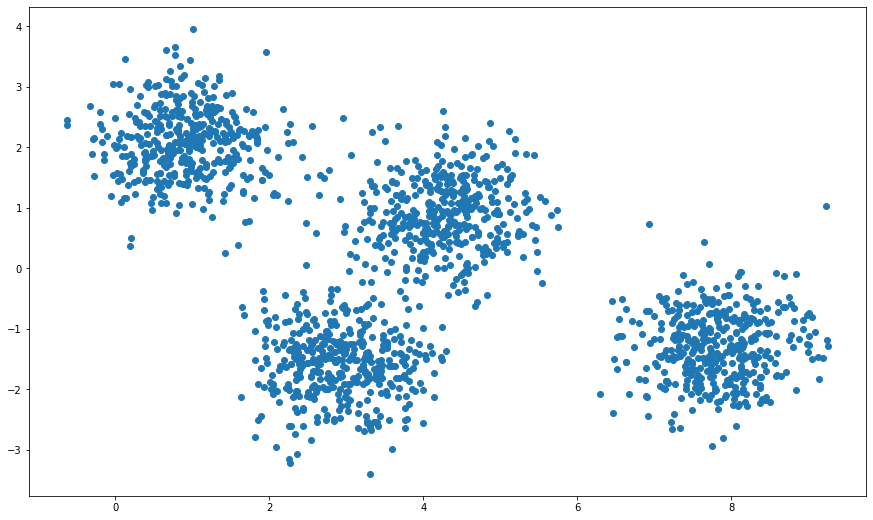

In [109]:
ratio = 6/10
width = 15
figsize = (width, width*ratio)
figure = graph.figure(figsize = figsize)
graph.scatter(df_raw['x'],df_raw['y'])
graph.scatter(means[0][0],means[0][1],c = 'red')
# graph.scatter(means[1][0],means[0][1],c = 'red')
graph.scatter(means[2][0],means[0][1],c = 'red')
graph.scatter(means[3][0],means[0][1],c = 'red')